# ATMOS 2022 - Station Analysis

---------

## 0. Import Libraries

In [2]:
import matplotlib.pyplot as plt
import proplot

from utils.data import *
from utils.utils import *
from utils.visualization_codes import *

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


----------

## 1. Open Data

In [3]:
province = 'istanbul'
dt = adjust_station_data(retrieve_station(province), 2011, 2018)

In [4]:
dt

,Year,Month,Day,Hour,17047,17059,17060,17061,17062,17063,17064,17065,17603,17610,17636,Date
0,2011,1,1,0,0.1,-1.2,0.0,1.0,2.5,-1.0,1.6,-1.7,1.6,-1.0,1.5,2011-01-01 00:00:00
1,2011,1,1,1,0.1,-1.0,0.1,1.1,3.6,-0.3,1.7,-2.4,1.7,-1.1,1.3,2011-01-01 01:00:00
2,2011,1,1,2,-0.5,-1.8,0.8,1.1,3.8,0.7,2.8,-1.1,1.8,-1.0,1.7,2011-01-01 02:00:00
3,2011,1,1,3,-0.1,-1.6,1.5,1.1,3.2,-1.0,3.1,-2.2,1.3,-0.7,0.7,2011-01-01 03:00:00
4,2011,1,1,4,0.0,-1.0,1.0,0.8,3.2,-0.2,3.9,-1.1,1.2,-1.1,1.1,2011-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70123,2018,12,31,19,2.5,6.7,6.7,4.9,6.3,3.7,5.0,4.1,5.6,5.0,5.6,2018-12-31 19:00:00
70124,2018,12,31,20,2.6,4.1,6.3,5.1,6.0,3.6,4.5,3.7,5.3,5.2,5.5,2018-12-31 20:00:00
70125,2018,12,31,21,2.8,3.2,6.1,5.0,5.9,2.9,4.3,3.4,5.0,4.9,5.4,2018-12-31 21:00:00
70126,2018,12,31,22,2.4,3.4,6.2,4.7,5.7,2.0,4.0,2.6,5.0,4.8,5.5,2018-12-31 22:00:00


In [5]:
dt.attrs

{'data-source': 'station',
 'var-name': 'T',
 'unit': 'degC',
 'province': 'istanbul'}

### 1.1 Get Metadata

In [6]:
metadata = get_station_metadata(province)
metadata

,station,y,x,landuse
0,17047,41.3409,28.3568,nourban
1,17059,41.2505,29.0384,nourban
2,17060,40.9819,28.8208,urban
3,17061,41.1464,29.0502,urban
4,17062,40.9883,29.0190,urban
5,17063,40.8977,29.3033,urban
6,17064,40.9113,29.1558,urban
7,17065,40.9866,29.2135,urban
8,17603,41.0155,28.9601,urban
9,17610,41.1688,29.6007,nourban


In [7]:
metadata.attrs

{'data-source': 'station metadata', 'province': 'istanbul', 'height-unit': 'm'}

----------

## 2. Long-Term Mean Difference

Long-term mean difference between urban and nourban in yearly, seasonally, monthly.

In [9]:
provinces = ['istanbul', 'ankara']

# land uses
luses = ['urban', 'nourban']

# date columns
date_cols = ['Date', 'Year', 'Month', 'Day', 'Hour']

# define datetime column name
datetime_col = 'Date'

# define mean types
mean_types = ['yearly', 'seasonal', 'monthly']
    
# mean type formulas
mean_formulas = [
    calculate_yearly_mean,
    calculate_seasonal_mean,
    calculate_monthly_mean
]

dict_province = {}

for province in provinces:
    
    # get province data
    dt = adjust_station_data(retrieve_station(province), 2011, 2018)
    metadata = get_station_metadata(province)

    # group urban and nourban stations
    grouped_meta = metadata.groupby('landuse')

    # dict to keep means
    dict_mean_type = {}

    for i, mean_type in enumerate(mean_types):

        dict_luse = {}

        # loop and find land use means
        for luse in luses:

            # get station data with corresponding land use
            luse_stations = grouped_meta.get_group(luse).station.tolist()

            # copy dataframe
            dt_luse = dt[date_cols + luse_stations].copy(deep=True)

            # calculate yearly seasonal and monthly means
            dict_luse[f'{province}-{luse}'] = mean_formulas[i](dt_luse, datetime_col)

        # accumulate mean type data
        dict_mean_type[mean_type] = dict_luse
        
    dict_province[province] = dict_mean_type

In [10]:
# concat istanbul and ankara data
concat_means = {}
for mean_type in mean_types:
    
    # concat
    concat_means[mean_type] = pd.concat([pd.DataFrame(dict_province[provinces[0]][mean_type]), 
                                           pd.DataFrame(dict_province[provinces[1]][mean_type])],
                                           axis=1)

In [9]:
# sample data
concat_means['seasonal']

,istanbul-urban,istanbul-nourban,ankara-urban,ankara-nourban
Season,,,,
DJF,7.332435,6.222106,2.201196,1.579120
MAM,16.614093,15.078893,13.991669,13.289976
JJA,24.790448,23.306585,22.798448,21.833363
SON,13.757847,12.659834,8.492811,7.803160


In [11]:
# sample data
concat_means['seasonal']

,istanbul-urban,istanbul-nourban,ankara-urban,ankara-nourban
Season,,,,
DJF,7.273937,6.007992,2.326692,1.609143
MAM,16.493116,14.889766,14.191678,13.265390
JJA,24.701648,23.048766,22.899396,21.973686
SON,13.712096,12.415833,8.478299,7.990085


/mnt/c/Users/USER/JupyterLab/Portfolio/ATMOS22-Paper-Codes/utils/visualization_codes.py:279: ProplotWarning: Got conflicting figure size arguments figwidth=9 and refwidth=1.5. Ignoring 'refwidth'.
  f, axs = proplot.subplots(array=[[1, 1, 2, 2],
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  return func(self, *args, **kwargs)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: 
The 'progressive' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'progressive': ...} instead. If any parameter follows 'progressive', they

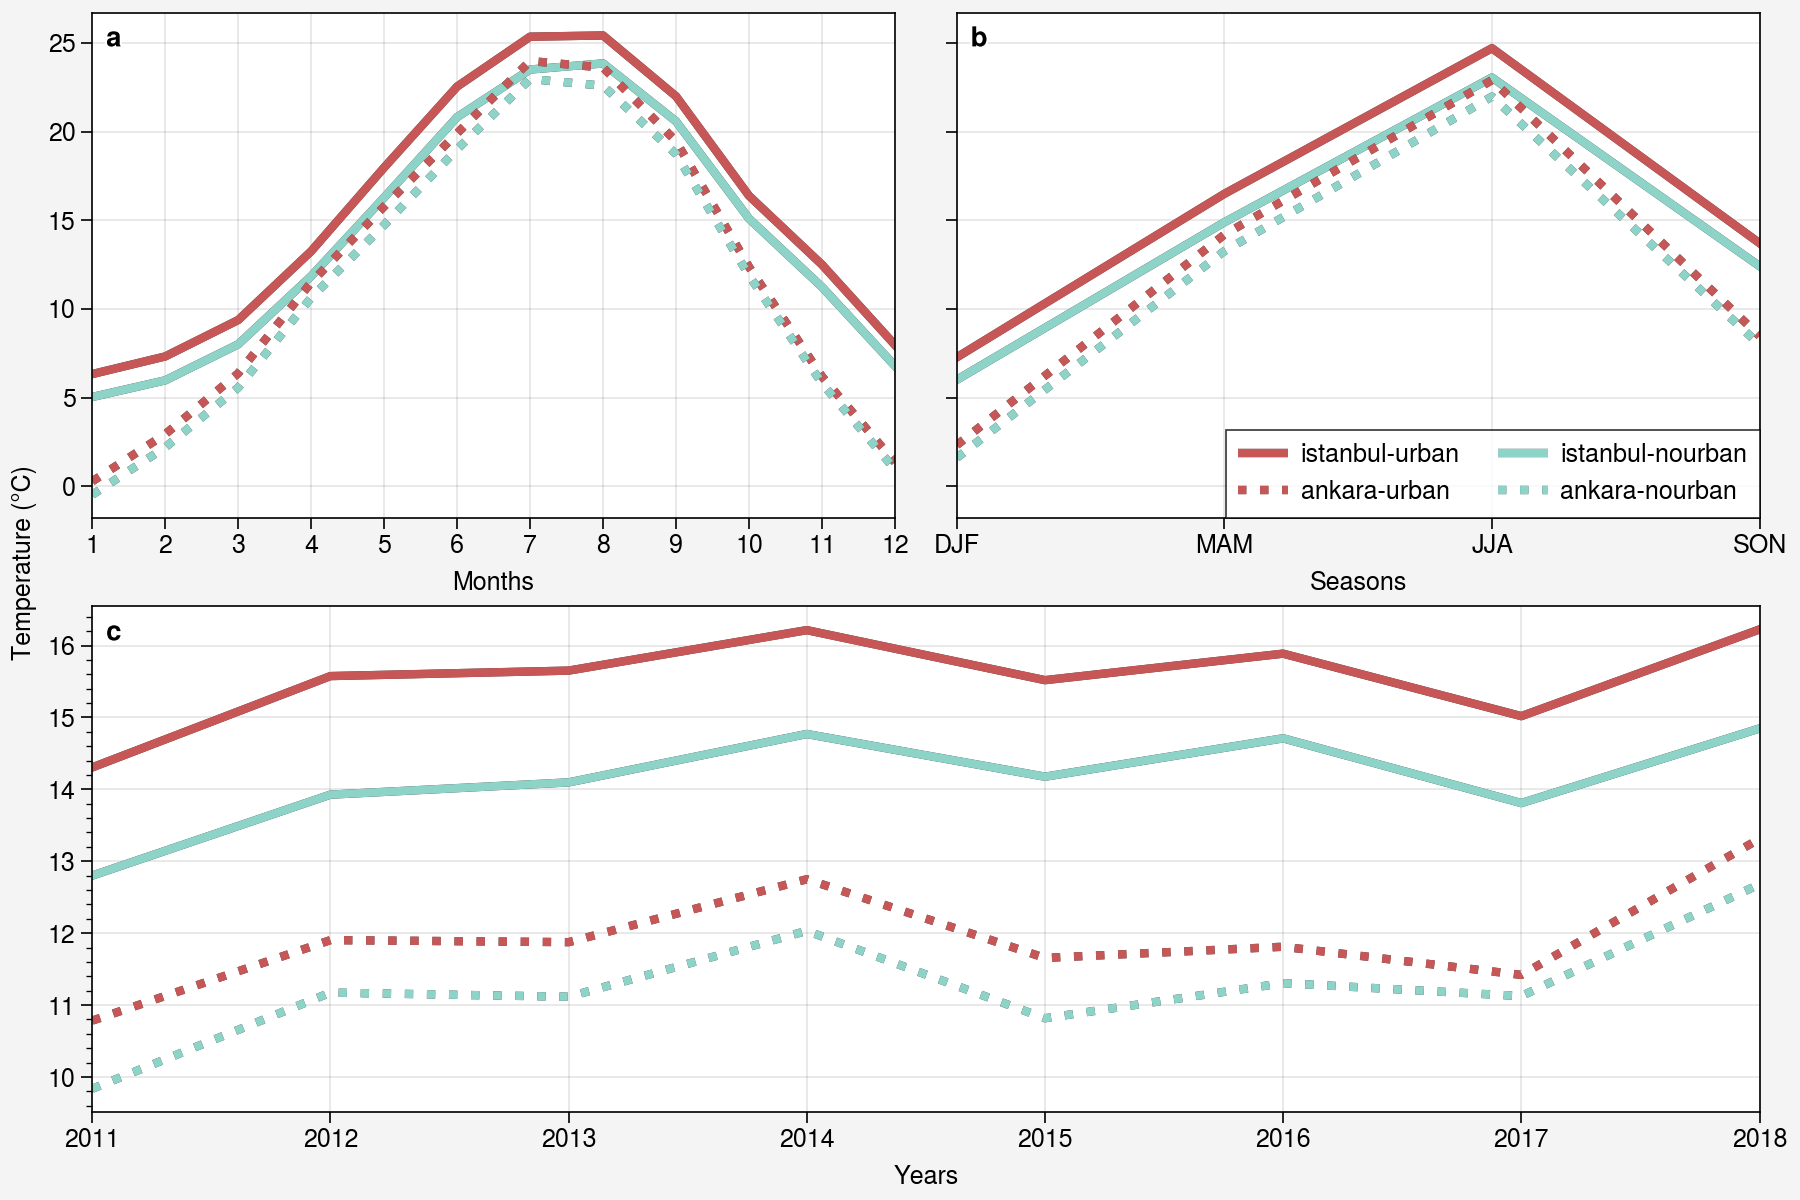

In [63]:
monthly_mean_df = concat_means['monthly']
seasonal_mean_df = concat_means['seasonal']
yearly_mean_df = concat_means['yearly']
method = 'station_time_mean_lineplot'

styles = ['-','-',':', ':']
colors = ['#c75757', '#8dd3c7', '#c75757', '#8dd3c7']

station_time_mean_lineplot(monthly_mean_df,
                           seasonal_mean_df,
                           yearly_mean_df,
                           method,
                           styles,
                           colors)

## 3. Creating PDF Plot

In [24]:
provinces = ['istanbul', 'ankara']

# land uses
luses = ['urban', 'nourban']

data_lu_dict = {}
for province in provinces:
    for luse in luses:
    
        dt = adjust_station_data(retrieve_station(province), 2011, 2018)
        metadata = get_station_metadata(province)

        lu_group_list = metadata.groupby('landuse').get_group(luse).station.to_list()
        
        data_lu_dict[province + '-' + luse] = remove_nan_from_array(np.array(dt[lu_group_list]).flatten())

In [25]:
data_lu_dict

{'istanbul-urban': array([0. , 1. , 2.5, ..., 2.7, 5.1, 5.2]),
 'istanbul-nourban': array([ 0.1, -1.2, -1. , ...,  2.4,  2.7,  4.7]),
 'ankara-urban': array([-2.2, -4.1, -3.3, ..., -6.5, -4.3, -0.4]),
 'ankara-nourban': array([-6.7, -3.5, -0.6, ..., -5.2, -4.4, -4.8])}

/tmp/ipykernel_289/1153721731.py:2: ProplotWarning: Got conflicting figure size arguments figwidth=6 and refwidth=1.5. Ignoring 'refwidth'.
  f, axs = proplot.subplots(array=[[1, 2]], hratios=(1),
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  return func(self, *args, **kwargs)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: 
The 'progressive' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'progressive': ...} instead. If any parameter follows 'progressive', they should be passed as keyword, not positionally.
 

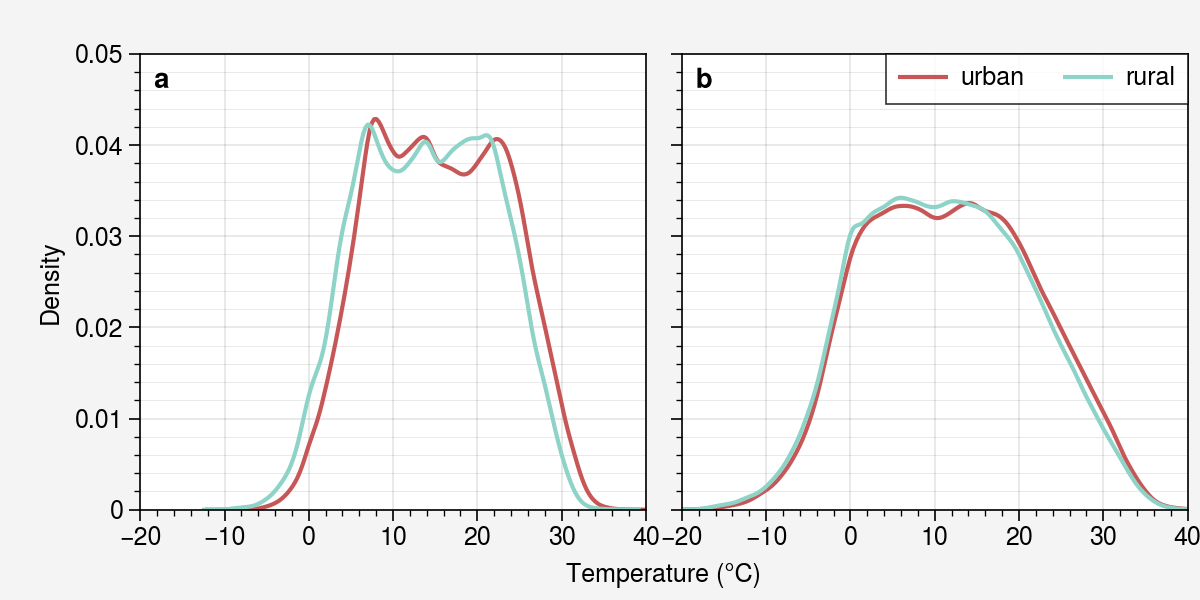

In [26]:
# start figure
f, axs = proplot.subplots(array=[[1, 2]], hratios=(1),
                          hspace=0.20, figsize=(6,3),
                          share=3, axwidth=1.5, tight=False)

# colors for lines
color_map = {'urban': '#c75757',
             'rural': '#8dd3c7'}

# make kdeplots containing urban and rural temperature distributions
for i, province in enumerate(provinces):
    
    # flatten and make a list out of the xarray datasets before plotting
    flatten_data_urban = data_lu_dict[province + '-' + 'urban']
    flatten_data_rural = data_lu_dict[province + '-' + 'nourban']
    
    sns.kdeplot(flatten_data_urban, ax=axs[i],
                color=color_map['urban'], 
                label='urban', legend=True)
    sns.kdeplot(flatten_data_rural, ax=axs[i],
                color=color_map['rural'], 
                label='rural', legend=True)

# format subfigures
for i in range(2):
    axs[i].format(ylabel='Density', xlabel='Temperature (°C)',
                  ygridminor=True, ygrid=True, #title=provinces[i],
                  titleloc='ll', xrotation=0, xlim=(-20, 40), ylim=(0, 0.05),
                  xlocator=proplot.arange(-20, 40, 10))

# format whole figure
axs.format(abcloc='ul', abc=True,)
axs[1].legend()
    
# savefig    
plt.savefig(fr'pictures/obs_pdf_fig.jpeg',
            bbox_inches='tight', optimize=False,
            progressive=True, dpi=1000)

## 4. Number of Days Analysis

In [8]:
temp_threshold = 30

In [22]:
provinces = ['istanbul', 'ankara']

# land uses
luses = ['urban', 'nourban']

data_days_dict = {}
for province in provinces:
    
    luse_dict = {}
    for luse in luses:
    
        dt = adjust_station_data(retrieve_station(province), 2011, 2018)
        metadata = get_station_metadata(province)

        lu_group_list = metadata.groupby('landuse').get_group(luse).station.to_list()
        dt = dt.set_index('Date')
        
        year_dict = {}
        for obs_year in range(2011, 2019):
        
            dt_date = dt[dt.index.year==obs_year][lu_group_list] 

            dt_daily_max = dt_date.resample('1D').max() 
            dt_threshold_days_median = np.round(np.median(np.where(dt_daily_max[lu_group_list]>=temp_threshold, 1, 0).sum(axis=0)), 0)

            year_dict[obs_year] = dt_threshold_days_median
            
        luse_dict[luse] = year_dict
    
    data_days_dict[province] = luse_dict

In [23]:
# median
data_days_dict

{'istanbul': {'urban': {2011: 32.0,
   2012: 50.0,
   2013: 32.0,
   2014: 39.0,
   2015: 36.0,
   2016: 50.0,
   2017: 40.0,
   2018: 56.0},
  'nourban': {2011: 4.0,
   2012: 25.0,
   2013: 3.0,
   2014: 19.0,
   2015: 20.0,
   2016: 24.0,
   2017: 15.0,
   2018: 39.0}},
 'ankara': {'urban': {2011: 40.0,
   2012: 66.0,
   2013: 40.0,
   2014: 60.0,
   2015: 59.0,
   2016: 50.0,
   2017: 64.0,
   2018: 52.0},
  'nourban': {2011: 29.0,
   2012: 56.0,
   2013: 30.0,
   2014: 56.0,
   2015: 48.0,
   2016: 47.0,
   2017: 51.0,
   2018: 37.0}}}